In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'./airquality.csv')

In [3]:
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [4]:
data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,medium
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low


In [6]:
data.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [7]:
# Data Cleaning

In [8]:
data['Ozone']=data['Ozone'].fillna(data['Ozone'].mean())

In [9]:
data['Solar.R']=data['Solar.R'].fillna(data['Solar.R'].mean())

In [10]:
data['Humidity'] = data['Humidity'].fillna(data['Humidity'].mode()[0])

In [11]:
data.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [13]:
data['Humidity'] = label_encoder.fit_transform(data['Humidity'])

In [14]:
data

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,2
149,42.12931,145.000000,13.2,77,9,27,2
150,14.00000,191.000000,14.3,75,9,28,2
151,18.00000,131.000000,8.0,76,9,29,2


## Pie Chart

In [15]:
import matplotlib.pyplot as plt

In [16]:
data.columns.values

array(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day', 'Humidity'],
      dtype=object)

In [17]:
labels = ['Ozone', 'Solar Radiation', 'Wind', 'Temperature']
sizes = [data['Ozone'].mean(), data['Solar.R'].mean(), data['Wind'].mean(), data['Temp'].mean()]

In [18]:
colors = ['Red','Blue','Green','Yellow']
explode = (0.1,0,0,0)

Text(0.5, 1.0, 'Average data')

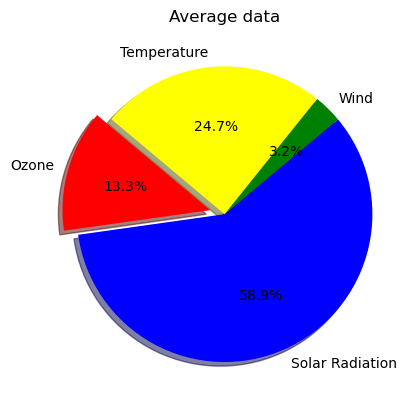

In [19]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average data')

## Bar Plot

In [20]:
import numpy as np
import seaborn as sns

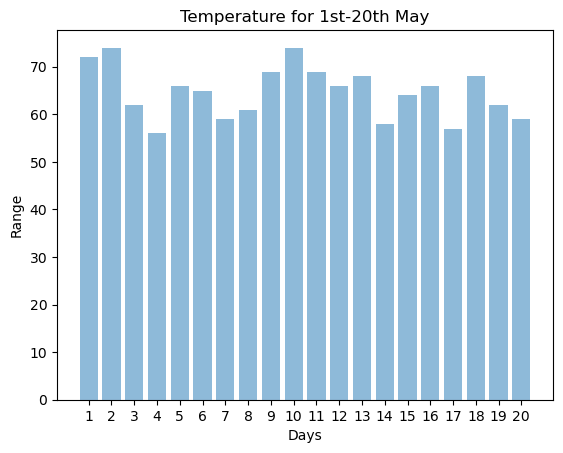

In [21]:
h = data.iloc[1:21, 3]
y_pos = np.arange(len(h))
v = range(1, 21)
plt.bar(y_pos, h, align='center', alpha=0.5)
plt.xticks(y_pos, v)
plt.ylabel('Range')
plt.xlabel("Days")
plt.title('Temperature for 1st-20th May')
plt.show()

## Histogram

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Value'),
 Text(0.5, 1.0, 'Histogram for Temperature')]

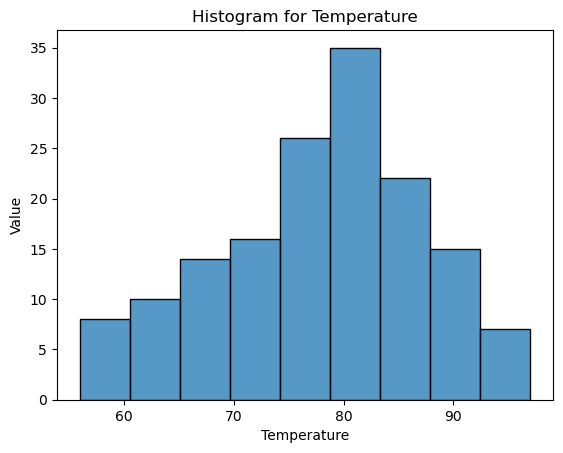

In [22]:
hist = sns.histplot(data=data, x="Temp")
hist.set(xlabel ="Temperature", ylabel = "Value", title ='Histogram for Temperature')

## Line Graph

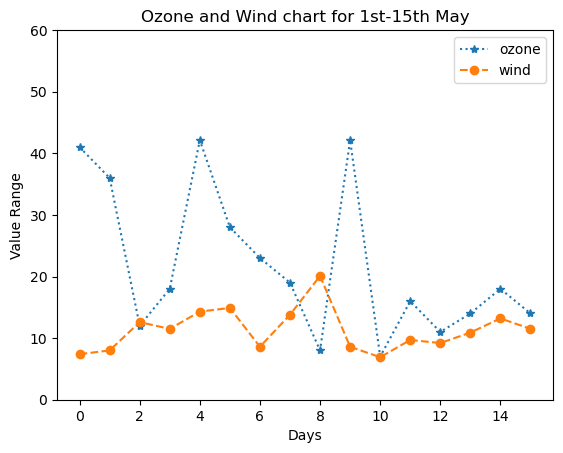

In [23]:
h = data.iloc[0:16, 0]
v = data.iloc[0:16, 2]
plt.plot(h, label='ozone', marker='*', linestyle='dotted')
plt.plot(v, label='wind', marker='o', linestyle='dashed')
plt.ylim(0, 60)
plt.legend()
plt.title("Ozone and Wind chart for 1st-15th May")
plt.ylabel("Value Range")
plt.xlabel("Days")
plt.show()

## Scatter Plot

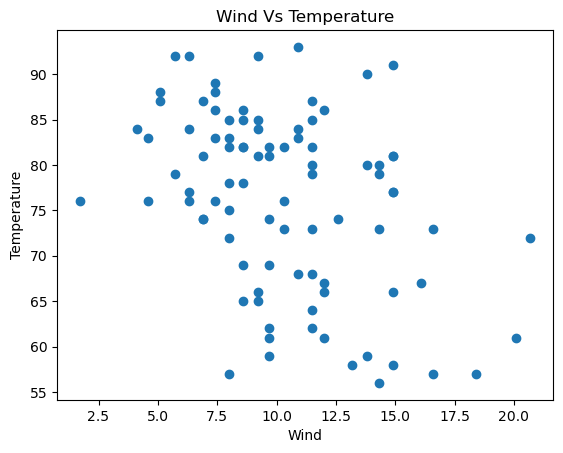

In [24]:
s=data.iloc[1:91,2]
t=data.iloc[1:91,3]
plt.scatter(s,t)
plt.title("Wind Vs Temperature")
plt.xlabel("Wind")
plt.ylabel("Temperature")
plt.show()

## Box Plot

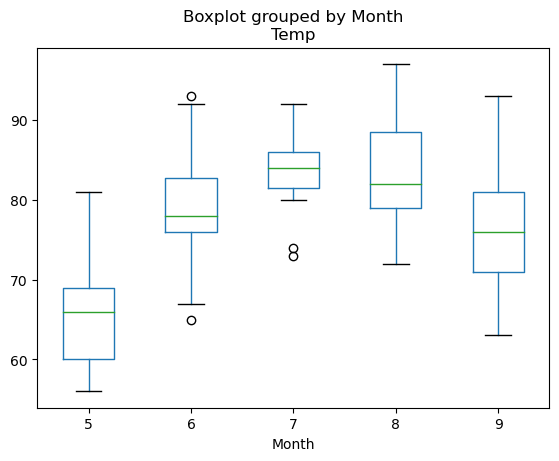

In [25]:
data.boxplot(by='Month',column=['Temp'], grid=False)
plt.show()

## Pair Plot

C:\Users\Chinmaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


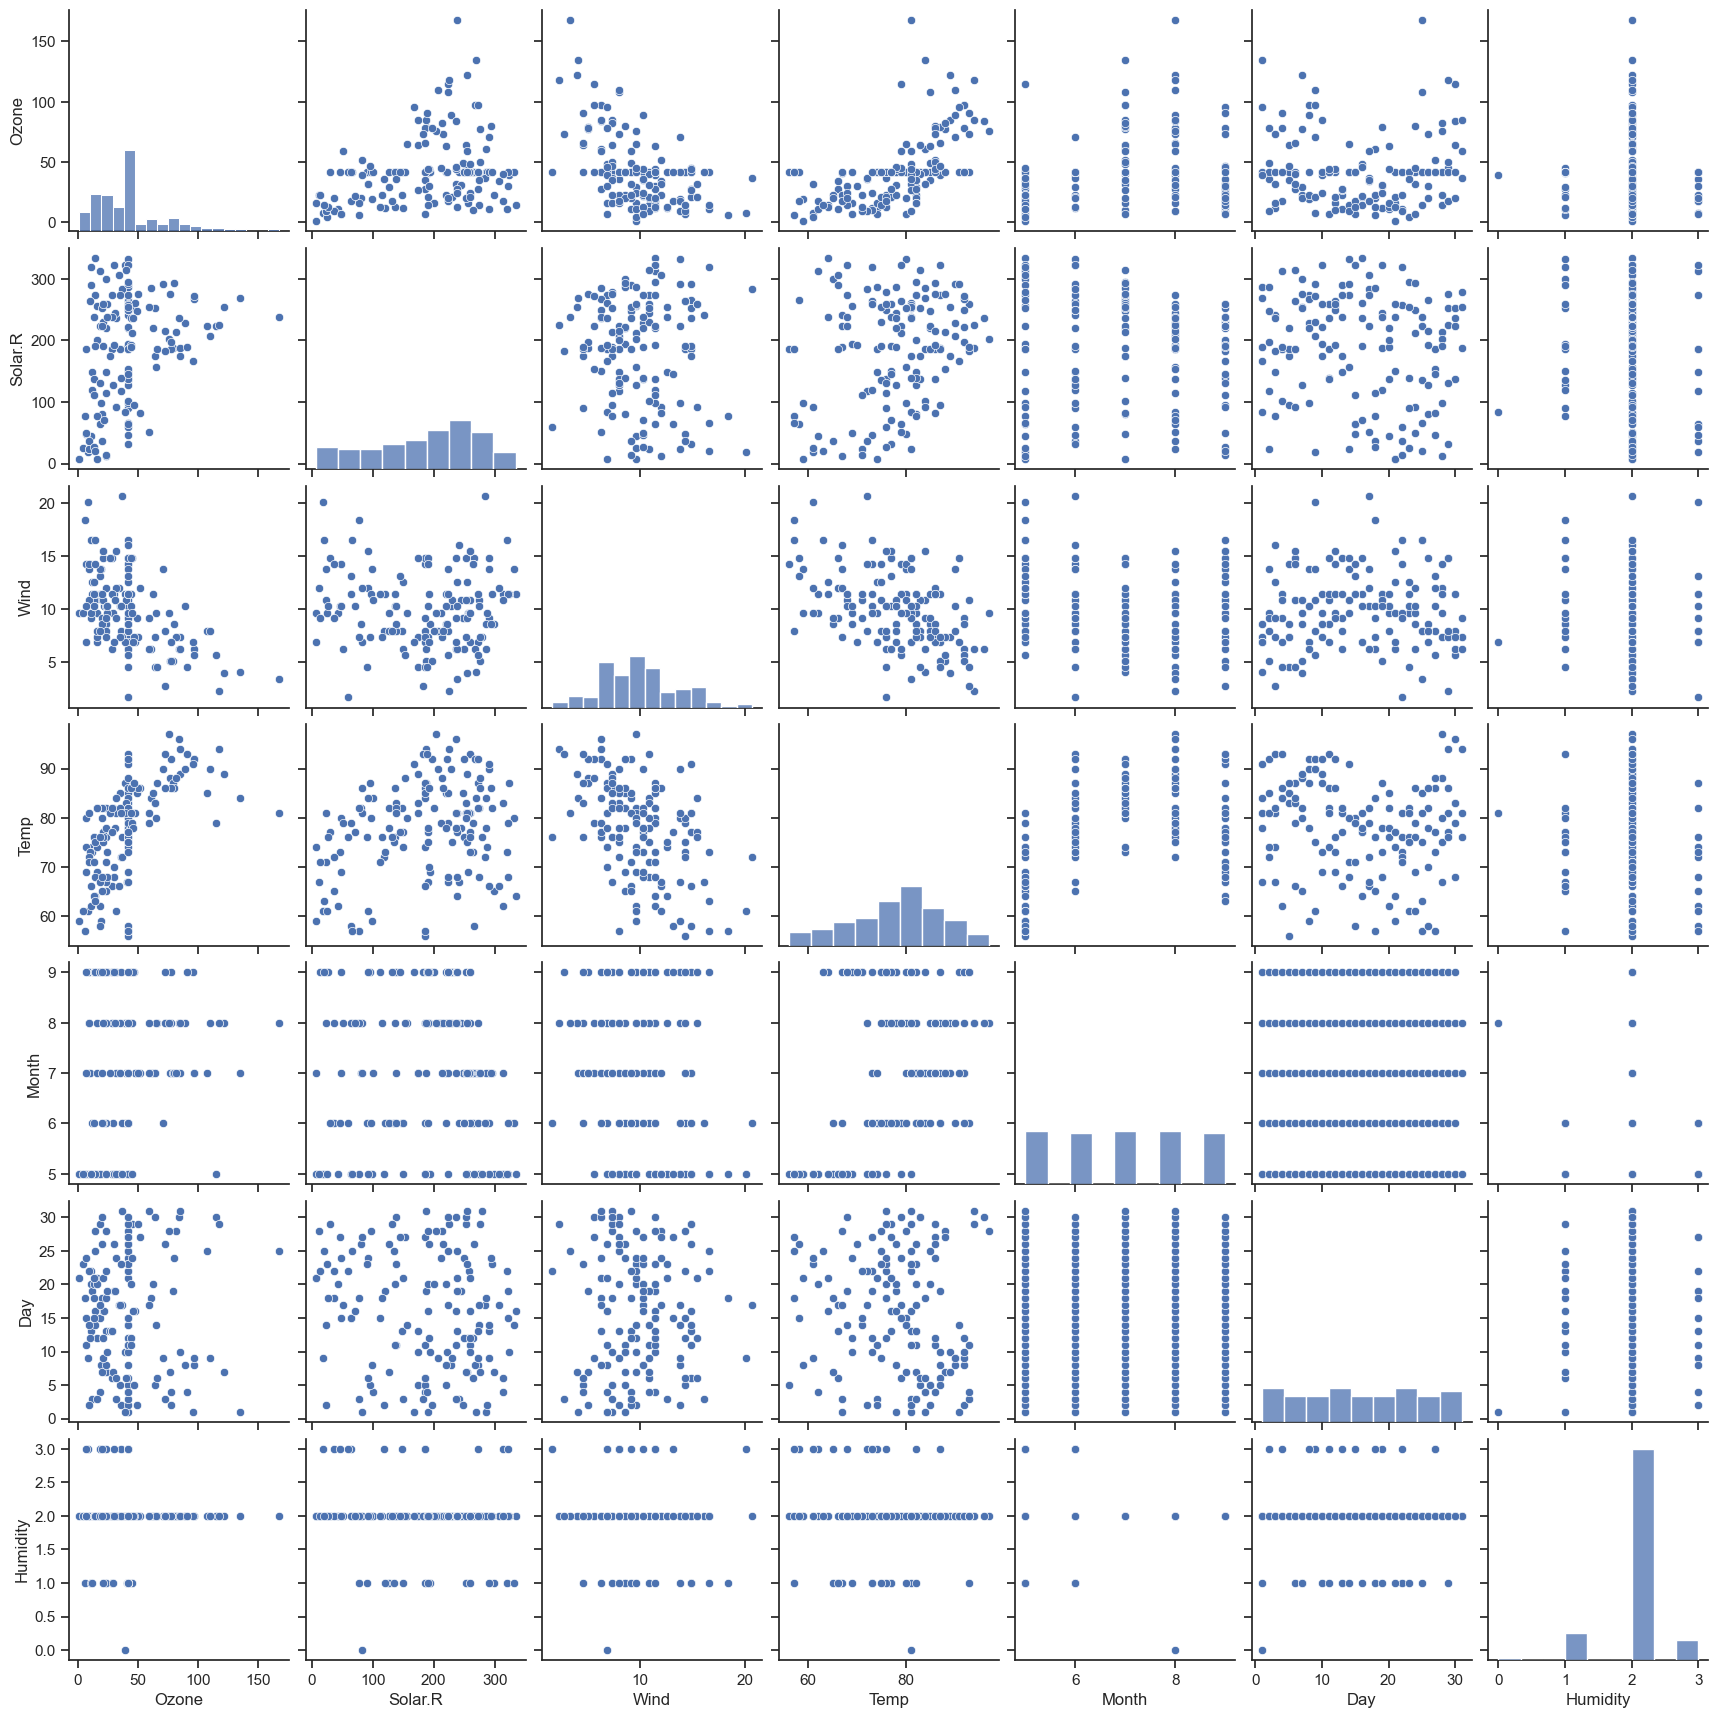

In [26]:
sns.set(style = "ticks")
sns.pairplot(data)
plt.show()

<Axes: >

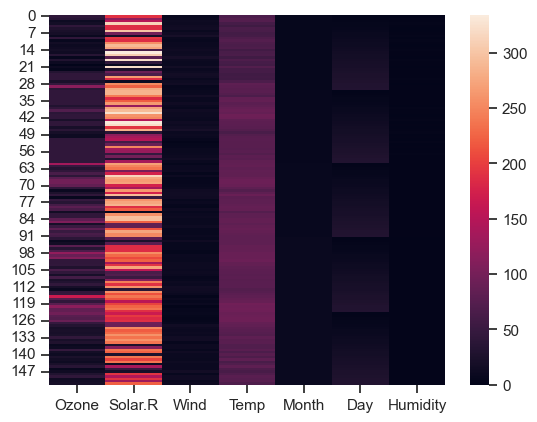

In [27]:
sns.heatmap(data)

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
with open(r"./wordcloud_data.txt" ,'r', encoding='utf-8') as file:
    text = file.read()

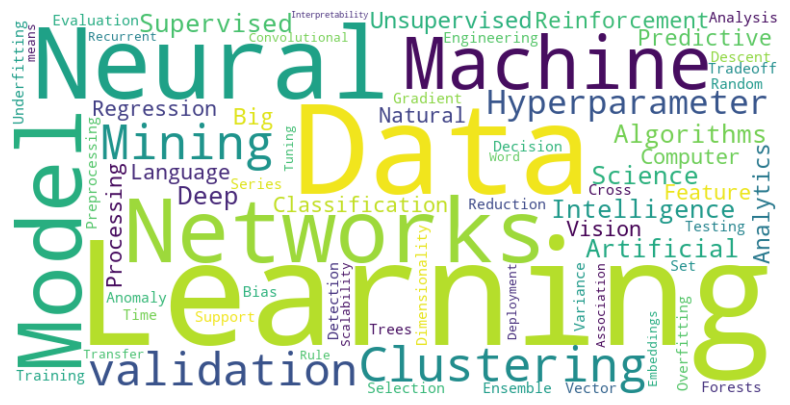

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()